In [47]:
import pandas as pd
is_change = True
count = 12
all_data = []     # 记录历届成绩
data = []         # 记录一届成绩
writer = pd.ExcelWriter('history.xls')
watches = set()
with open('history.txt') as f:    
    for line in f:
        if line.strip():
            # 非空行
            if is_change:
                is_change = False
            # 读取、清理空格、记录数据
            data.append([l.strip() for l in line.split('┃')])
        else:
            # 遇到空行，结束一届的记录
            if not is_change:
                # 记录数据
                df = pd.DataFrame(data)
                all_data.append(df)
                # 写入文件
                df.to_excel(writer, sheet_name=f'No.{count}', index=False)
                # 把前3名加入集合
                top3 = list(df[1][:3])
                watches.update(top3)
                # 重置参数
                is_change = True
                count -= 1
                data = []
writer.save()
watches

{'上海', '北京', '山东', '广东', '江苏', '解放军', '辽宁'}

In [55]:
gold = {}
all_data.reverse()
# 遍历队伍
for team in watches:
    gold[team] = []
    # 遍历每一届数据
    for data in all_data:
        gold[team].append(float(data[data[1]==team][2]))

# 输出
for team in gold:
    print(team, gold[team])

解放军 [117.0, 72.0, 19.0, 50.0, 16.0, 13.0, 14.0, 24.5, 33.0, 44.0, 49.0, 45.0]
山东 [21.0, 17.0, 7.0, 21.0, 4.0, 12.0, 12.0, 25.0, 22.0, 42.0, 63.0, 65.0]
北京 [42.0, 30.0, 36.0, 44.0, 17.0, 17.0, 21.0, 20.0, 23.0, 32.0, 30.0, 33.0]
上海 [46.0, 38.0, 19.0, 36.0, 33.0, 32.0, 26.0, 42.0, 29.5, 26.0, 41.0, 45.0]
江苏 [4.0, 6.0, 10.0, 19.0, 13.0, 9.0, 18.0, 23.0, 24.5, 56.0, 48.5, 45.0]
广东 [31.0, 23.0, 38.0, 44.0, 36.0, 54.0, 29.0, 24.5, 69.5, 46.0, 45.0, 50.5]
辽宁 [4.0, 9.0, 13.0, 28.0, 22.0, 32.5, 44.0, 39.5, 41.0, 31.0, 48.0, 56.0]


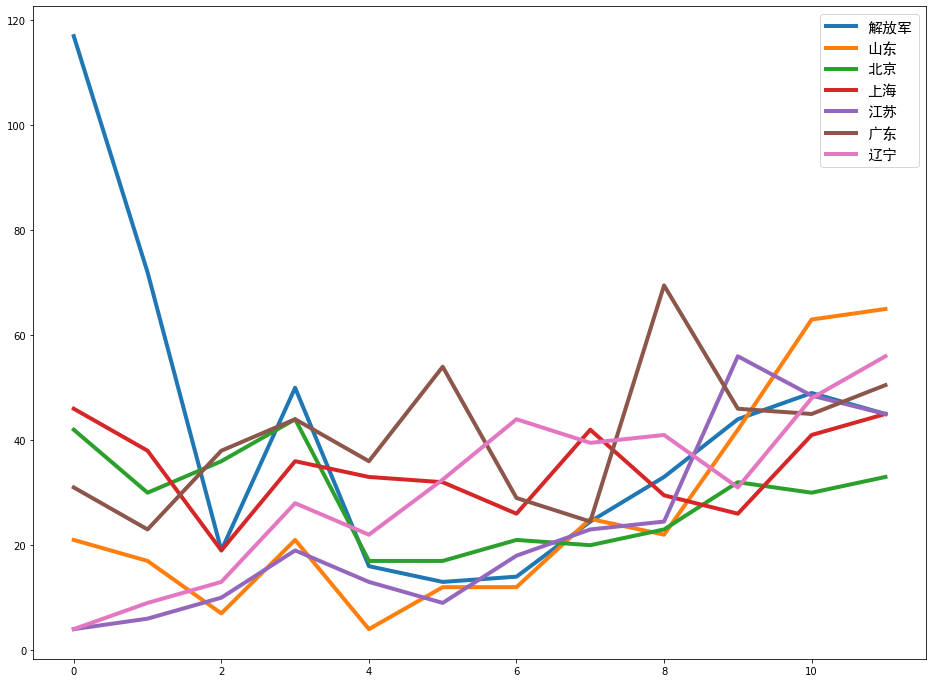

In [56]:
import matplotlib.pyplot as plt
from pylab import mpl

plt.rcParams['figure.figsize'] = (16, 12)
# 中文乱码问题（自行下载）
font = mpl.font_manager.FontProperties(fname='../zhaozi.ttf', size=15)

for team in gold:
    plt.plot(gold[team], linewidth=4, label=team)
plt.legend(prop=font)

In [57]:
from pyecharts.charts import Line

line = Line()
line.add_xaxis(xaxis_data=range(1, 13))
for team in gold:
    line.add_yaxis(team, gold[team])
line.render_notebook()